# Song Popularity Project

## Importing The Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv('song_data.csv')

df.head(1)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.06,4,0.474


In [ ]:
df.shape

(18835, 15)

*So we have 18,835 record and 15 columns, we will talk every feature or every column, and what does it mean, because before we go deeper into the analytics we have to understand the data as much as possible*

### Columns Description

`song_popularity` the target and the predicted columns <br>
`song_duraiton_ms` the song duration in mellisecond <br>
`acousticness` A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic <br>
`danceability` Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. <br>
`energy` movement of energy through a substance in waves. <br>
`instrumentalness` This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is. <br>
`key`  a system of functionally related chords deriving from the major and minor scales, and there is 12 key <br>
`liveness`  reverberation time. A live room has a long reverberation time and a dead room a short reverberation time. <br>
`loudness`  perception that determines how much sound pressure a particular source is emitting at a given time <br>
`audio_mode`  are scales that use the same pitches of the standard major scale but in new and different ways. <br>
`speechiness`  detects the presence of spoken words in a track 
*   above 0.66 --> made of spoken words
*   between 0.33 and 0.66 --> contain both music and words
*   below 0.33 --> the song does not have any speech

`tempo` how fast or slow a piece of music is performed <br>
`time_signature` how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat. <br>
`audio_velence` Describes the musical positiveness conveyed by a track high 
* value --> happier track
* lower value --> sad track





## Data Wrangling

*Make a new column for the song duration per minute (`song_duration_m`) by divide the `song_duration_ms` by (1000 * 60), then drop the `song_duration_ms` column from the data frame*

In [ ]:
# Making the new column
df['song_duration_m'] = df['song_duration_ms'] / (1000 * 60)

# Dropping the old column
df.drop(columns='song_duration_ms', inplace=True)

we will drop the `song_name` column, because it doesn't make sence to keep it, because every song has its own name, and the song name will not affect the song popularity 

In [ ]:
# Drop the song_name column
df.drop(columns='song_name', inplace=True)

# Print the shape
df.shape

(18835, 14)

## EDA (Exploratory Data Analysis)

### Data Cleaning

*Check if there is any <b>Missing Values</b> in the `df`*

In [ ]:
df.isnull().sum()

song_popularity     0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
song_duration_m     0
dtype: int64

*Fortunately there is no null values `NaN` in the `df`, so we don't have to do any king of Handling Missing Values* 

*Check if there is any <b>Categorical Columns </b> in the `df`*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   acousticness      18835 non-null  float64
 2   danceability      18835 non-null  float64
 3   energy            18835 non-null  float64
 4   instrumentalness  18835 non-null  float64
 5   key               18835 non-null  int64  
 6   liveness          18835 non-null  float64
 7   loudness          18835 non-null  float64
 8   audio_mode        18835 non-null  int64  
 9   speechiness       18835 non-null  float64
 10  tempo             18835 non-null  float64
 11  time_signature    18835 non-null  int64  
 12  audio_valence     18835 non-null  float64
 13  song_duration_m   18835 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.0 MB


*Fortunately, as we can see, all the columns have numerical values, so we don't have to do any kind of encoding.*

#### Visualization is your friend

##### Boxplot

*Now, we will making `boxplot` figures for every column, just to see the skewness, and the outliers of the data.*

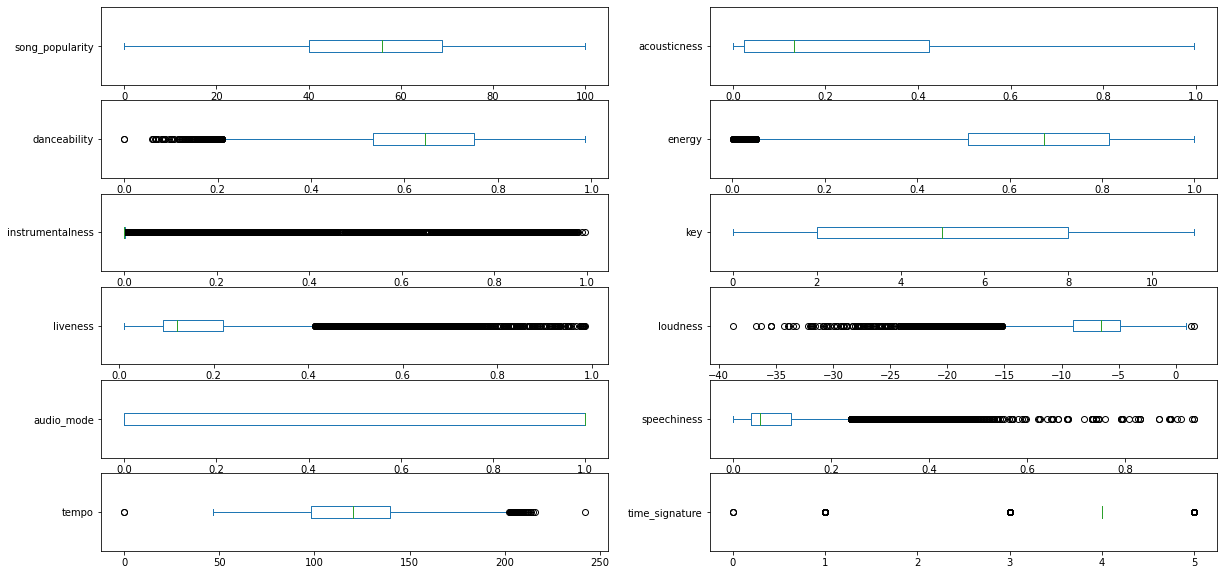

In [ ]:
fig = plt.figure(figsize=(20,10))
i = 1
for col in df.columns:
  if i < 13:
    fig.add_subplot(6,2,i)
    i += 1
    df[col].plot(kind='box',  vert=False)
  else:
    break

*We've gain a lot of information through these plots, such as* 
*  `song_popularity` and `acousticness` have no outliers
* there is one big outlier in the `danceablity` column --> we will handle it
* there is no outliers in the `energy` column, because those outliers are very close to each other, so we can't consider them as outlier
* there is something wrong in the `instrumentalness` column --> we will dive into it
* the `key` column are good
* the `audio_mode` are kind of wierd, it seem its a binary column --> we will see
* the `speechiness` column has a number of outliers --> we will handle them
* `tempo` has on big outlier values, and one small outlier --> we will delete them
* `time_signature` seem has only 5 values --> we will look to it too

<hr>

**dive into `danceability` column, and remove the outliers**

In [ ]:
# Just to see a statistical information about the danceability column
df['danceability'].describe()

count    18835.000000
mean         0.633348
std          0.156723
min          0.000000
25%          0.533000
50%          0.645000
75%          0.748000
max          0.987000
Name: danceability, dtype: float64

In [ ]:
# Sort the values in ascending way and show the first 5 values
df['danceability'].sort_values()[:5]

11171    0.0000
7119     0.0000
5953     0.0594
2959     0.0617
5941     0.0625
Name: danceability, dtype: float64

*we can say the first two values are outliers, so we will delete anything with 0 values and less*

In [ ]:
print("The shape before: ", df.shape)
df = df[df['danceability'] > 0]
print("The shape after: ", df.shape)

The shape before:  (18835, 14)
The shape after:  (18833, 14)


<hr>

**Dive into the `instrumentalness` column**

In [ ]:
df['instrumentalness'].describe()

count    18833.000000
mean         0.077965
std          0.221508
min          0.000000
25%          0.000000
50%          0.000011
75%          0.002570
max          0.997000
Name: instrumentalness, dtype: float64

*There is a problem here, the 75% of the data are under `0.002` value, and the max value are `0.997`*

In [ ]:
df['instrumentalness'].sort_values(ascending=False)[:10]

5922     0.997
9745     0.989
4825     0.982
17515    0.979
4836     0.978
5952     0.977
4801     0.975
5941     0.974
7925     0.973
6187     0.973
Name: instrumentalness, dtype: float64

we will take off and remove the top 2% of the `instrumentalness` column using `quantile` method

In [ ]:
top_2 = df['instrumentalness'].quantile(0.98)
top_2

0.908

In [ ]:
print("The shape before: ", df.shape)
df = df[df['instrumentalness'] <= top_2]
print("The shape after: ", df.shape)

The shape before:  (18833, 14)
The shape after:  (18462, 14)


*We've deleted about 400 record from the dataframe*

<hr>

**Dive into `audio_mode` column**

In [ ]:
df['audio_mode'].unique()

array([1, 0])

*As we've expected, it has i binary values, 1 or 0* 

<hr>

*Dive into `speechiness` column*

In [ ]:
df['speechiness'].describe()

count    18462.000000
mean         0.102635
std          0.104691
min          0.022400
25%          0.037700
50%          0.055800
75%          0.120000
max          0.941000
Name: speechiness, dtype: float64

There is the same problem that we had with the `instrumentalness` column

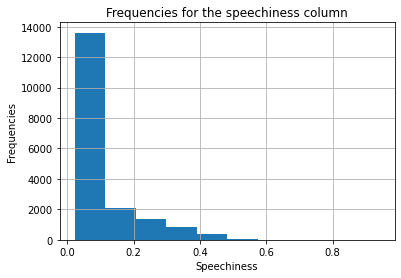

In [ ]:
df['speechiness'].hist()
plt.title("Frequencies for the speechiness column")
plt.xlabel("Speechiness")
plt.ylabel("Frequencies");

In [ ]:
top_4 = df['speechiness'].quantile(0.96)
top_4

0.355

In [ ]:
print("The shape before: ", df.shape)
df = df[df['speechiness'] <= top_4]
print("The shape after: ", df.shape)

The shape before:  (18462, 14)
The shape after:  (17727, 14)


---
**Dive into `tempo` column**

In [ ]:
df['tempo'].describe()

count    17727.000000
mean       121.085083
std         28.034542
min         46.591000
25%         99.165000
50%        120.013000
75%        139.275000
max        242.318000
Name: tempo, dtype: float64

*Remove the lowest 0.5% and the upper 99.5% of the data*

In [ ]:
low, high = df['tempo'].quantile([0.005, 0.995])
low, high

(67.2867, 199.93172999999996)

In [ ]:
print("The shape before: ", df.shape)
df = df[df['tempo'].between(low, high)]
print("The shape after: ", df.shape)

The shape before:  (17727, 14)
The shape after:  (17549, 14)


<hr>

**Dive into `time_signature` columns**

In [ ]:
df['time_signature'].unique()

array([4, 3, 1, 5])

*There is only 4 unique values in that column, so we can't consider any outliers in that column*

<hr>

##### Histogram

let's make another kind of plot for all columns after some cleaning, we will use the `Histogram` plot from `matplotlib` library




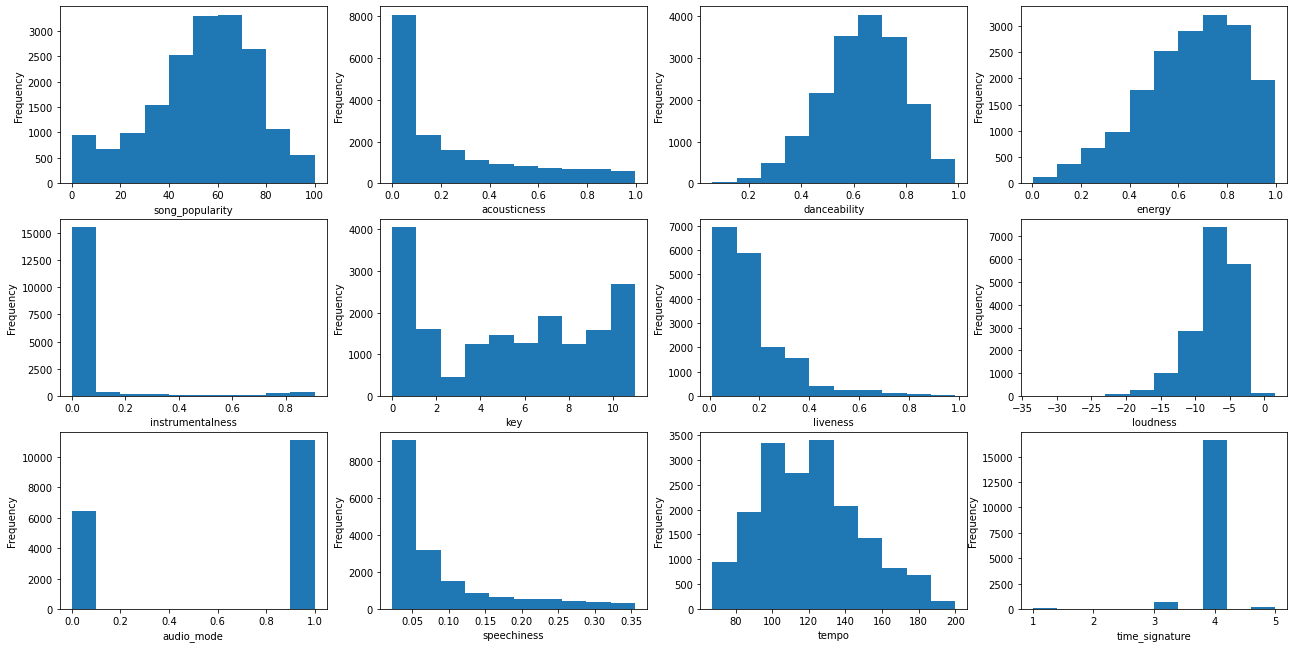

In [ ]:
fig = plt.figure(figsize=(22,15))
i = 1
for col in df.columns:
  if i < 13:
    fig.add_subplot(4,4,i)
    i += 1
    df[col].plot(kind='hist');
    plt.xlabel(col)
  else:
    break

*In the `acousticness, instrumentalness, liveness, speechiness` columns a kind of skewness, so we need to do some kind of normalization*

### Preproccessing

In [ ]:
#the columns for the normalization
cols = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']

# We will do the Square Root Transformed Data to handle the skewness

# Transform the data and re assign it to the specific columns in the data frame
df[cols] = np.sqrt(df[cols])

*Let's relook to the histograms for the specific columns again after the normalization*

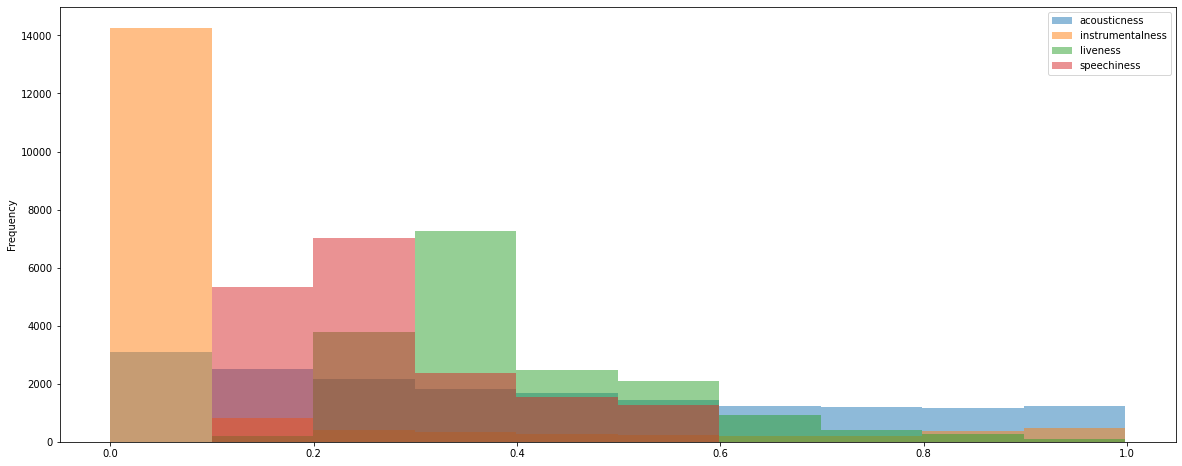

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df[cols].plot(kind='hist', ax = ax , alpha= 0.5);

*It really fixed the skewness, but there is still in the `instrumentalness` column some of it, we will fix it*

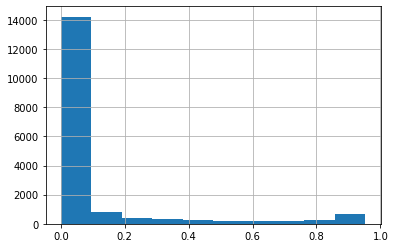

In [ ]:
df['instrumentalness'].hist(); 

*We will delete the whole in the middle, we're just gonna take the values*

In [ ]:
#len(df[(df['instrumentalness'] <= 0.4) ^ (df['instrumentalness'] >=0.78)])

#### Making Normalization for some features

In [ ]:
df.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_m
0,73,0.074297,0.496,0.682,0.005422,8,0.242693,-4.095,1,0.171464,167.060,4,0.474,4.372217
1,66,0.101489,0.542,0.853,0.000000,3,0.328634,-6.407,0,0.223159,105.256,4,0.370,3.615550
2,76,0.090388,0.737,0.463,0.668581,0,0.504975,-7.828,1,0.281425,123.881,4,0.324,3.862217
3,74,0.162481,0.451,0.970,0.059582,0,0.319374,-4.938,1,0.327109,122.444,4,0.198,3.615550
4,56,0.030887,0.447,0.766,0.000000,10,0.336155,-5.065,1,0.176918,172.011,4,0.574,3.730433


*We can see the almost all the columns have small values, except the `popularity, key, tempo, time_signature` columns. But the* 
* `popularity` is the target column, we can't manipulate it.
* `key, time_signature` are a discrete values, we can't manipulate them or normalize them
* only `tempo` we can do normalization for it

*We will use `MinMaxScaler` from the `sklearn` package*

In [ ]:
# Import the required methods
from sklearn.preprocessing import MinMaxScaler

# Making object
mms = MinMaxScaler()

# Fitting the data
mms.fit(pd.DataFrame(df['tempo']))

# Transform the data and re assign it to the normal df
df['tempo'] = mms.transform(pd.DataFrame(df['tempo']))

In [ ]:
# Lets look to the first 5 values
df['tempo'].head()

0    0.752181
1    0.286091
2    0.426550
3    0.415713
4    0.789519
Name: tempo, dtype: float64

### Find Correlation between features

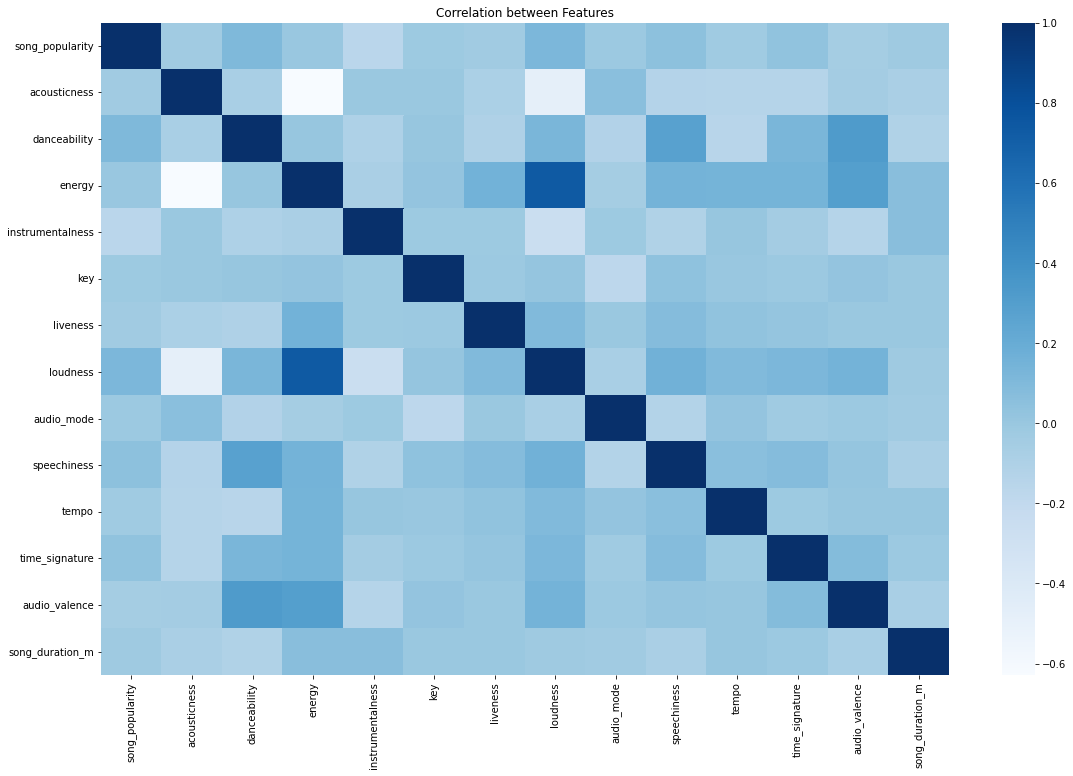

In [ ]:
# Make a data frame with the correlation values
corr = df.corr()

fig, ax  = plt.subplots(figsize=(19,12))

sns.heatmap(corr, ax= ax, cmap='Blues')

plt.title("Correlation between Features");

There a pretty good positive corelation between `energy` and `loudness`, and it does make sense <br>
and pretty good negative corelation between 
* `loudness` and `acousticness`
* `energy` and `acousticness`


<hr>

In [ ]:
df.groupby('key')['song_popularity'].mean().sort_values(ascending=False)

key
1     56.024623
6     55.469565
10    54.139073
11    54.097250
8     53.406930
0     53.385888
5     53.178426
2     52.208927
4     52.195860
9     51.296954
7     50.998438
3     50.260870
Name: song_popularity, dtype: float64

*The key with value 1 has the most high mean of the song popularity*

In [ ]:
df.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_m
0,73,0.074297,0.496,0.682,0.005422,8,0.242693,-4.095,1,0.171464,0.752181,4,0.474,4.372217
1,66,0.101489,0.542,0.853,0.000000,3,0.328634,-6.407,0,0.223159,0.286091,4,0.370,3.615550
2,76,0.090388,0.737,0.463,0.668581,0,0.504975,-7.828,1,0.281425,0.426550,4,0.324,3.862217
3,74,0.162481,0.451,0.970,0.059582,0,0.319374,-4.938,1,0.327109,0.415713,4,0.198,3.615550
4,56,0.030887,0.447,0.766,0.000000,10,0.336155,-5.065,1,0.176918,0.789519,4,0.574,3.730433


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


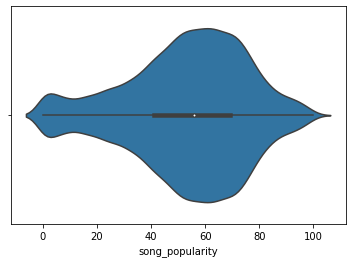

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


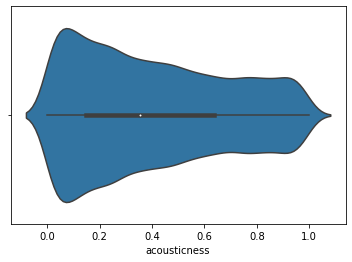

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


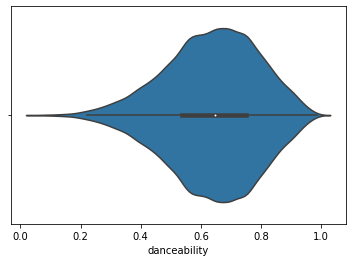

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


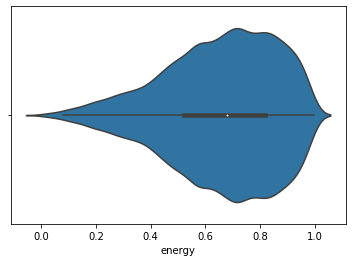

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


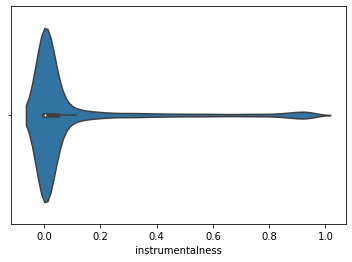

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


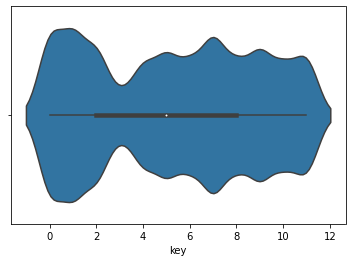

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


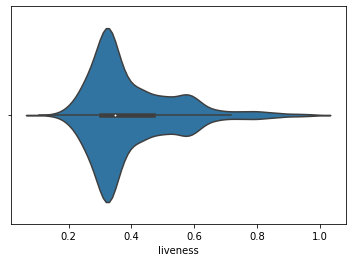

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


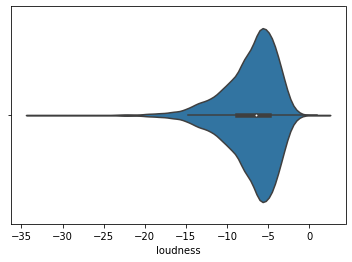

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


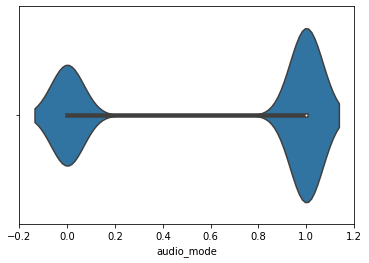

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


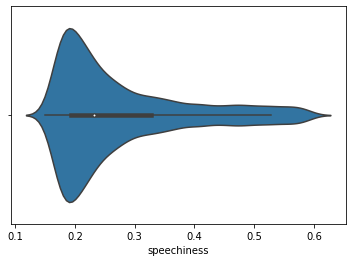

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


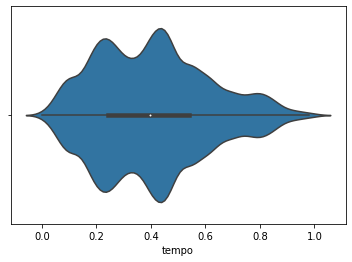

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


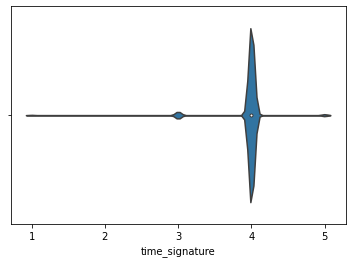

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


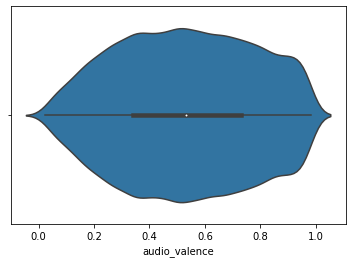

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


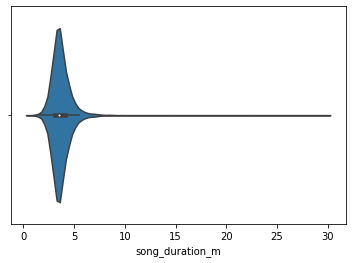

In [ ]:
for col in df.columns:
  sns.violinplot(df[col]);
  plt.show();

*The `song_duration_m` column has an outliers we didn't notice, let's take a deeper look*

In [ ]:
df['song_duration_m'].describe()

count    17549.000000
mean         3.658732
std          0.981410
min          0.522883
25%          3.100000
50%          3.533333
75%          4.056883
max         29.989100
Name: song_duration_m, dtype: float64

In [ ]:
df['song_duration_m'].sort_values(ascending=False)

18147    29.989100
17797    22.598967
479      20.561100
16825    14.448150
501      13.944433
           ...    
11165     0.993333
18056     0.962200
11125     0.908983
10706     0.841800
3726      0.522883
Name: song_duration_m, Length: 17549, dtype: float64

*We will remove any song the exceed its time the 8 minutes*

In [ ]:
print("The shape before: ", df.shape)
df = df[df['song_duration_m'] < 8]
print("The shape after: ",df.shape)

The shape before:  (17549, 14)
The shape after:  (17481, 14)


In [ ]:
##############  NEW
df.to_csv('song_data_cleaned.csv', index= False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


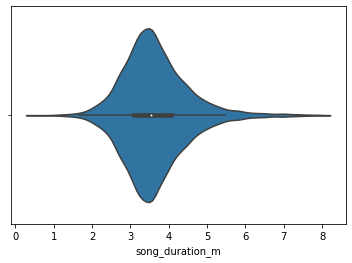

In [ ]:
sns.violinplot(df['song_duration_m']);

*And now it goes perfect*

## Modeling

### Split the data into Features and Target

In [ ]:
X = df.drop(columns='song_popularity')
y = df['song_popularity']

In [ ]:
# Print the shape to make sure
X.shape, y.shape

((17481, 13), (17481,))

*Everything works fine*

### Split the data into `Training` and `Testing`

In [ ]:
# Import the required packages
from sklearn.model_selection import train_test_split

# Making the variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=22)

In [ ]:
# Printing the shape to make sure
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13984, 13), (13984,), (3497, 13), (3497,))

*Yup, Everything is perfect*

### Build number of Machine Learning Models

#### Linear Regression

In [ ]:
# Import the required model
from sklearn.linear_model import LinearRegression 

# Build the model
linear = LinearRegression()

# Fit the model with the data
linear.fit(X_train, y_train)

# Predict data using the model
y_pred = linear.predict(X_test)

*Lets use a quick metrics to see how good is our model <br> we will use `r2_score`, `mean_squared_error`, and `root_mean_squared_error`*

In [ ]:
# Import the required metrics 
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred) # r2_score
mse = mean_squared_error(y_test, y_pred) # mean_squared_error
rmse = np.sqrt(mse) # root_mean_squared_error

# printing the results
print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.06297659547203627
MSE:  441.8699103130335
RMSE:  21.020701946248927


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.016440989967612674
MSE:  463.81459571922255
RMSE:  21.53635520971974


#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.4157327993505938
MSE:  275.5215017066264
RMSE:  16.59884037234609


#### XGBoost

In [ ]:
# Install the package
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor

xg = XGBRegressor(n_estimators=50000, learning_rate= 0.2, min_child_weight=20, max_depth = 6)

xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.3160735435313977
MSE:  322.5175812259803
RMSE:  17.95877449120569


#### Catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=10000,silent=True,learning_rate=0.3,depth=10)

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.32299618557924736
MSE:  319.25308729121724
RMSE:  17.86765477871165


#### Sequential

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [ ]:
model = tf.keras.models.Sequential()

model.add(Dense(units=30, input_dim=13, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=30, kernel_initializer='normal', activation='tanh'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, batch_size=30, epochs= 50, verbose=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.08468983132949637
MSE:  431.63065104311704
RMSE:  20.775722635882417


#### KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=20)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2: ", r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.0590772001962766
MSE:  443.7087389190735
RMSE:  21.064395052293182


## Evaluate the performance

*From multiple attemps, we've knew that the `RandomFoerstRegressor` is the best Machine Learning Algorithm for our data, lets train the model one more time and evaluate it*

In [ ]:
# Build the model
rf_model = RandomForestRegressor(n_estimators=500)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
# Making prediction from the model
y_pred = rf_model.predict(X_test)

### Quality of the Regression Model

In [ ]:
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 

print("R2:", r2.round(4),"--> which means we can predict about", (r2.round(2)*100),"% from the data by this model.")
print("RMSE:",rmse.round(4),"--> which means that the predictions from this model will be between", int(rmse),"higher or",int(rmse),"lower in the worst case.")

R2: 0.4168 --> which means we can predict about 42.0 % from the data by this model.
RMSE: 16.5841 --> which means that the predictions from this model can be 16 higher or 16 lower in the worst case.


### Communication result

*We want to know what are the most important features to the model, we can do that by access to the `feature_importances_` variable inside the method, then we want to plug it to pandas series with the columns names as the index*

In [ ]:
# Feature importances (just numbers without labels)
feat = rf_model.feature_importances_

# Making a Series, with columns names as index
feat_imp = pd.Series(feat, index= X_train.columns)

# Sort the values in descending way
feat_imp.sort_values(ascending=False)

loudness            0.103243
audio_valence       0.099077
acousticness        0.096833
danceability        0.094773
song_duration_m     0.094253
instrumentalness    0.093111
energy              0.091242
tempo               0.090118
speechiness         0.089647
liveness            0.088432
key                 0.044146
audio_mode          0.009714
time_signature      0.005410
dtype: float64

*We can see that the `loudness` are the most important feature to the model, but also all of them seem pretty close to each other, except the `key, audio_mode, time_signature` features*

*We have to plot the result to see more clearly

In [ ]:
# Plotly is plotting interactive plots
import plotly.express as px

# Making a line plot with title
fig = px.line(feat_imp, title="Feature importance in the Random Forest Regressor Model")

# Show the plot
fig.show()

In [ ]:
# Making bar chart for the feat_imp after sorting the values in descending order
fig = px.bar(feat_imp.sort_values(ascending=False))

fig.show()

In [ ]:
# Making the chart in a hirozintal way
fig = px.bar(feat_imp.sort_values(ascending=True), orientation='h')

fig.show()

*Now we can clearly see what are the most important features for the model.*

## Evaluate The Performance of your Model

### Quality of the model:
R2 | RMSE |
--- | --- |
0.4168 | 16.5841 |

### Computational metrics
RAM (GB) | Time Spent (m) | Hard DIst (GB) 
----- | ------ | ------ |
3.38 | 1.7 | 38.72

